In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MultiLabelBinarizer,LabelEncoder,OneHotEncoder,StandardScaler 
%matplotlib inline
import seaborn as sns


In [2]:
#read the file
df = pd.read_csv('listings.csv')

In [3]:
#see top 5 rows
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
#check its size
df.shape

(3818, 92)

In [5]:
#see some statistics of the data
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [6]:
#check data types
df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [7]:
#see its columns
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [8]:
#identify numeric columns
df.select_dtypes(include=['float', 'int64']).columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [9]:
#create a new dataframe with features we are interested in
new_df = df[["id", "room_type", "bathrooms", "bedrooms", "amenities", "beds", "bed_type", "price", "square_feet","guests_included", "minimum_nights", "number_of_reviews"]]

In [10]:
#check null values
new_df.isnull().sum()

id                      0
room_type               0
bathrooms              16
bedrooms                6
amenities               0
beds                    1
bed_type                0
price                   0
square_feet          3721
guests_included         0
minimum_nights          0
number_of_reviews       0
dtype: int64

Tthere are so many null cells in square_feet columns therefore I exclude it from my data table.

In [11]:
#drop square_feet
new_df = new_df.drop(columns = ['square_feet'])

In [12]:
#replace null values in columns bathrooms, bedrooms, beds with their means.
new_df['bathrooms'] = new_df['bathrooms'].fillna(new_df['bathrooms'].mean())
new_df['bedrooms'] = new_df['bedrooms'].fillna(new_df['bedrooms'].mean())
new_df['beds'] = new_df['beds'].fillna(new_df['beds'].mean())
#check whether they are dropped
new_df.isnull().sum()

id                   0
room_type            0
bathrooms            0
bedrooms             0
amenities            0
beds                 0
bed_type             0
price                0
guests_included      0
minimum_nights       0
number_of_reviews    0
dtype: int64

In [13]:
#remove $ signs and commas from values in price columns
new_df['price'] = new_df['price'].str.replace('$', '')
new_df['price'] = new_df['price'].str.replace(',', '')

In [14]:
#Changing data type from string to float.
new_df['price'] = new_df['price'].astype(float)

### Q1. What is the landlords' preferences for lenght of stay?

In [15]:
#see the distribution of minimum nights
new_df.groupby('minimum_nights')['id'].count()

minimum_nights
1       1610
2       1423
3        480
4        122
5         67
6         16
7         50
8          1
10         5
11         1
12         1
13         2
14        16
15         1
20        11
21         1
26         1
28         1
29         1
30         6
31         1
1000       1
Name: id, dtype: int64

Here we see there is an outlier which has value 1000. This is most probably a typing error. I prefer to remove it from my analysis since it will make my visuals messy.

In [16]:
#drop the outlier
new_df.drop(new_df.loc[new_df['minimum_nights']==1000].index, inplace=True)
new_df.groupby('minimum_nights')['id'].count()

minimum_nights
1     1610
2     1423
3      480
4      122
5       67
6       16
7       50
8        1
10       5
11       1
12       1
13       2
14      16
15       1
20      11
21       1
26       1
28       1
29       1
30       6
31       1
Name: id, dtype: int64

In [17]:
#set bins for our chart
bins = new_df['minimum_nights'].unique()
bins.sort()

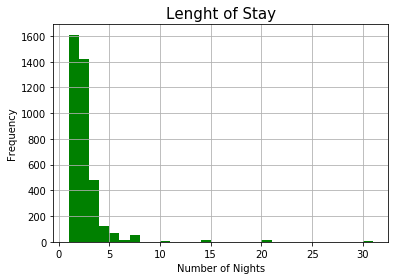

In [18]:
#print the chart
plt.hist(new_df['minimum_nights'], bins=bins, align='mid', color = 'g')
plt.xlabel('Number of Nights')
plt.ylabel('Frequency')
plt.title('Lenght of Stay', fontsize=15)

plt.grid(True)
plt.show();

Referring to the graph above we can see it is obviously right-skewed which means landlords accept guests for a short period of days.

### Q2. What are the most common amenities?

In [19]:
#see some examples in amenities columns
new_df['amenities'].head()

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [20]:
#change format of amenities list while replacing related characters
amt = new_df['amenities'].apply(lambda x: [amenity.replace('"', "").replace("{", "").replace("}", "") 
                                               for amenity in x.split(",")])

In [21]:
amt.head()

0    [TV, Cable TV, Internet, Wireless Internet, Ai...
1    [TV, Internet, Wireless Internet, Kitchen, Fre...
2    [TV, Cable TV, Internet, Wireless Internet, Ai...
3    [Internet, Wireless Internet, Kitchen, Indoor ...
4    [TV, Cable TV, Internet, Wireless Internet, Ki...
Name: amenities, dtype: object

In [22]:
#set MultiLabelBinarizer to separate amenities
mlb = MultiLabelBinarizer()
label_amt = pd.DataFrame(mlb.fit_transform(amt), columns=mlb.classes_, index=amt.index)

In [23]:
#amenities are summed and sorted to define what is the common/popular amenities in Seatle Airbnb dataset.
amt_count=label_amt.sum().sort_values(ascending=False)

In [24]:
#save values into dataframe
d = {'Amenity': amt_count.index, 'Count': amt_count.values}
df_amt_count = pd.DataFrame(data=d)
df_top_5 = df_amt_count.head()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

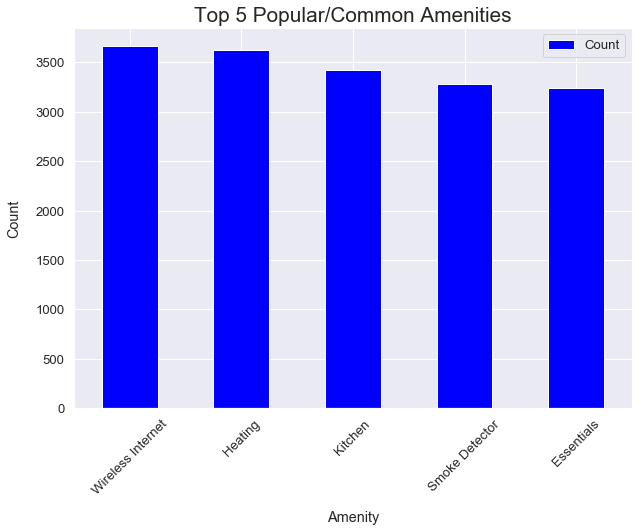

In [25]:
#create the bar chart
sns.set(font_scale=1.2)
df_top_5.plot(x='Amenity', y='Count', kind='bar', figsize=(10, 7), rot=0, color='blue')
plt.xlabel("Amenity", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Top 5 Popular/Common Amenities", fontsize='x-large')
plt.xticks(rotation=45)

### Q3. What factors do affect price of proprty most?

In order to understand this I will build a machine learning algorithm. To build our algorithm I need to make sure all variables in my dataset must be in numerical values, thereore I should change categorical variables into numerical values.

In [26]:
#Lets check if we have any categorical variables in our dataset.
new_df.dtypes

id                     int64
room_type             object
bathrooms            float64
bedrooms             float64
amenities             object
beds                 float64
bed_type              object
price                float64
guests_included        int64
minimum_nights         int64
number_of_reviews      int64
dtype: object

Here we see that we have two categorical variables; room_type and bed_type.

In [27]:
#create categorical variables
new_df['room_type'] = pd.get_dummies(new_df['room_type'])
new_df['bed_type'] = pd.get_dummies(new_df['bed_type'])

In [28]:
#check values in bed type
new_df['bed_type'].value_counts()

0    3790
1      27
Name: bed_type, dtype: int64

In [29]:
#check values in rommo type
new_df['room_type'].value_counts()

1    2540
0    1277
Name: room_type, dtype: int64

Obviously there is no much diversity in bed_type therefore we can exclude it from our model as it cannot make a significant effect on our model.

In [30]:
#drop bed type
new_df.drop('bed_type', axis=1)

,id,room_type,bathrooms,bedrooms,amenities,beds,price,guests_included,minimum_nights,number_of_reviews
0,241032,1,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,85.0,2,1,207
1,953595,1,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1.0,150.0,1,2,43
2,3308979,1,4.5,5.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",7.0,975.0,10,4,20
3,7421966,1,1.0,0.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",2.0,100.0,1,1,0
4,278830,1,2.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",3.0,450.0,6,1,38
...,...,...,...,...,...,...,...,...,...,...
3813,8101950,1,2.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",3.0,359.0,1,3,1
3814,8902327,1,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2.0,79.0,3,2,2
3815,10267360,1,1.0,1.0,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",1.0,93.0,2,1,0
3816,9604740,1,1.0,0.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",1.0,99.0,1,3,0


In [31]:
#check data types for ML algorithm
new_df.dtypes

id                     int64
room_type              uint8
bathrooms            float64
bedrooms             float64
amenities             object
beds                 float64
bed_type               uint8
price                float64
guests_included        int64
minimum_nights         int64
number_of_reviews      int64
dtype: object

In [32]:
#drop amanities as it is in object type and cannot be used in ML algorithm
new_df.drop('amenities', axis=1, inplace=True)

In [33]:
#set X and y columns
y = new_df['price']
X = new_df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [34]:
#initiate and fit the model
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train) 

#predict for both train and test data
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [35]:
#calculate success of our model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [36]:
test_score, train_score

(0.5406384551108453, 0.5140272813168463)

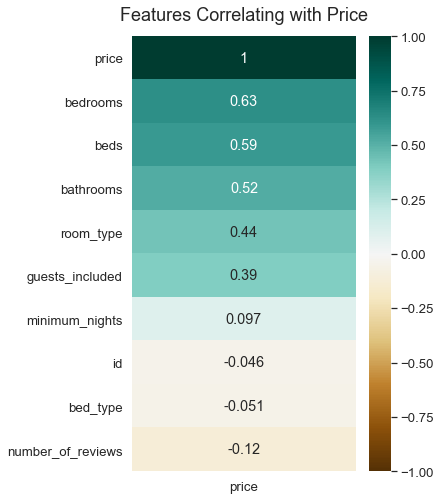

In [37]:
#draw heatmap to see correlation of variables with price
new_df.corr()[['price']].sort_values(by='price', ascending=False)
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(new_df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

Obviously number of bedrooms is the most strongest effect on price. Number of bathrooms and room type are also other factors affecting price most. Surprisingly, number of reviews does not have a significant effect on price.